In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import NUTILS as nutils
import matplotlib.pyplot as plt

In [7]:
# Prepare data sets
df_t = nutils.load_data('./train_prepared.csv')
df_s = nutils.load_data('./test_prepared.csv')

train_set, test_set = train_test_split(df_t, test_size=0.2, random_state=42)

X_full = nutils.encode(nutils.drop_features(df_t))
y_form_full = df_t["formation_energy_ev_natom"]
y_band_full = df_t["bandgap_energy_ev"]

X_train = nutils.encode(nutils.drop_features(train_set))
X_test  = nutils.encode(nutils.drop_features(test_set))
X_submt = nutils.encode(nutils.drop_features(df_s))
                       
y_form = train_set["formation_energy_ev_natom"]
y_band = train_set["bandgap_energy_ev"]
                       
y_form_test = test_set["formation_energy_ev_natom"]
y_band_test = test_set["bandgap_energy_ev"]

y_comb = np.column_stack((y_form_full.values, y_band_full.values))
y_comb_train = np.column_stack((y_form.values, y_band.values))
y_comb_test = np.column_stack((y_form_test.values, y_band_test.values))

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import SGD
import keras.losses as losses
from keras import regularizers

# For custom metrics
import keras.backend as K

def rmsle(y_actual, y_pred):
    return K.sqrt(losses.mean_squared_logarithmic_error(y_actual, y_pred))

In [38]:
keras_callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1
    )
]

model_f = Sequential()
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None, input_dim=X_train.shape[1]))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(140, activation='elu', kernel_initializer='he_uniform', kernel_regularizer=None))
model_f.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model_f.add(Dropout(0.2))
model_f.add(Dense(2))
#sgd = SGD(lr=0.0001, decay=1e-7, momentum=0.9, nesterov=True)

sgd = SGD(lr=0.001, momentum=0.9)
model_f.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss=losses.mean_absolute_error,
              metrics=[rmsle])

history_f = model_f.fit(X_full.values, y_comb,
              epochs=2200,
              validation_split=0.2,
              batch_size=X_full.shape[0])
              #callbacks=keras_callbacks)

#score_f = model_f.evaluate(X_test.values, y_comb_test, batch_size=X_full.shape[0])
#print("Test ", model_f.metrics_names[1], ": ", score_f[1])

Train on 1920 samples, validate on 480 samples
Epoch 1/2200
1920/1920 [==============================] - 4s 2ms/step - loss: 1.9106 - rmsle: 0.6722 - val_loss: 1.0980 - val_rmsle: 0.4424
Epoch 2/2200
1920/1920 [==============================] - 0s 10us/step - loss: 1.7513 - rmsle: 0.6319 - val_loss: 1.0826 - val_rmsle: 0.4292
Epoch 3/2200
1920/1920 [==============================] - 0s 9us/step - loss: 1.6655 - rmsle: 0.6075 - val_loss: 1.1030 - val_rmsle: 0.4400
Epoch 4/2200
1920/1920 [==============================] - 0s 9us/step - loss: 1.6097 - rmsle: 0.6054 - val_loss: 1.0721 - val_rmsle: 0.4450
Epoch 5/2200
1920/1920 [==============================] - 0s 9us/step - loss: 1.5640 - rmsle: 0.5880 - val_loss: 1.0247 - val_rmsle: 0.4394
Epoch 6/2200
1920/1920 [==============================] - 0s 9us/step - loss: 1.5150 - rmsle: 0.5689 - val_loss: 1.0189 - val_rmsle: 0.4500
Epoch 7/2200
1920/1920 [==============================] - 0s 9us/step - loss: 1.4600 - rmsle: 0.5678 - val_loss:

Epoch 59/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.7803 - rmsle: 0.3738 - val_loss: 0.4540 - val_rmsle: 0.2657
Epoch 60/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.7847 - rmsle: 0.3759 - val_loss: 0.4426 - val_rmsle: 0.2610
Epoch 61/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.7776 - rmsle: 0.3701 - val_loss: 0.4329 - val_rmsle: 0.2575
Epoch 62/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.7553 - rmsle: 0.3646 - val_loss: 0.4242 - val_rmsle: 0.2537
Epoch 63/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.7679 - rmsle: 0.3696 - val_loss: 0.4210 - val_rmsle: 0.2517
Epoch 64/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.7423 - rmsle: 0.3567 - val_loss: 0.4182 - val_rmsle: 0.2494
Epoch 65/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.7349 - rmsle: 0.3528 - val_loss: 0.4131 - val_rmsle: 0.2464
Epoch 66/22

Epoch 117/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.4410 - rmsle: 0.2115 - val_loss: 0.2355 - val_rmsle: 0.1088
Epoch 118/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.4405 - rmsle: 0.2151 - val_loss: 0.2289 - val_rmsle: 0.1071
Epoch 119/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.4355 - rmsle: 0.2119 - val_loss: 0.2411 - val_rmsle: 0.1136
Epoch 120/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.4314 - rmsle: 0.2101 - val_loss: 0.2616 - val_rmsle: 0.1225
Epoch 121/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.4340 - rmsle: 0.2095 - val_loss: 0.2727 - val_rmsle: 0.1272
Epoch 122/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.4316 - rmsle: 0.2088 - val_loss: 0.2772 - val_rmsle: 0.1285
Epoch 123/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.4173 - rmsle: 0.2058 - val_loss: 0.2757 - val_rmsle: 0.1279
Ep

Epoch 175/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.2918 - rmsle: 0.1403 - val_loss: 0.2263 - val_rmsle: 0.1026
Epoch 176/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.2959 - rmsle: 0.1437 - val_loss: 0.2414 - val_rmsle: 0.1127
Epoch 177/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2883 - rmsle: 0.1395 - val_loss: 0.2478 - val_rmsle: 0.1174
Epoch 178/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2864 - rmsle: 0.1380 - val_loss: 0.2498 - val_rmsle: 0.1184
Epoch 179/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2864 - rmsle: 0.1367 - val_loss: 0.2474 - val_rmsle: 0.1162
Epoch 180/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.2760 - rmsle: 0.1341 - val_loss: 0.2468 - val_rmsle: 0.1133
Epoch 181/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2819 - rmsle: 0.1351 - val_loss: 0.2442 - val_rmsle: 0.1098
Epo

Epoch 233/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2227 - rmsle: 0.1061 - val_loss: 0.2216 - val_rmsle: 0.0980
Epoch 234/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2140 - rmsle: 0.1019 - val_loss: 0.2151 - val_rmsle: 0.0954
Epoch 235/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2139 - rmsle: 0.1027 - val_loss: 0.2006 - val_rmsle: 0.0906
Epoch 236/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.2110 - rmsle: 0.1009 - val_loss: 0.1889 - val_rmsle: 0.0863
Epoch 237/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.2090 - rmsle: 0.0994 - val_loss: 0.1772 - val_rmsle: 0.0811
Epoch 238/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2109 - rmsle: 0.0994 - val_loss: 0.1751 - val_rmsle: 0.0797
Epoch 239/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.2093 - rmsle: 0.0992 - val_loss: 0.1805 - val_rmsle: 0.0815
Epoc

Epoch 291/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1809 - rmsle: 0.0875 - val_loss: 0.1705 - val_rmsle: 0.0779
Epoch 292/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1889 - rmsle: 0.0874 - val_loss: 0.1739 - val_rmsle: 0.0798
Epoch 293/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1860 - rmsle: 0.0884 - val_loss: 0.1728 - val_rmsle: 0.0795
Epoch 294/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1844 - rmsle: 0.0891 - val_loss: 0.1648 - val_rmsle: 0.0768
Epoch 295/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1820 - rmsle: 0.0855 - val_loss: 0.1591 - val_rmsle: 0.0750
Epoch 296/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1902 - rmsle: 0.0874 - val_loss: 0.1581 - val_rmsle: 0.0748
Epoch 297/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1830 - rmsle: 0.0885 - val_loss: 0.1579 - val_rmsle: 0.0749
E

Epoch 349/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1668 - rmsle: 0.0800 - val_loss: 0.1429 - val_rmsle: 0.0691
Epoch 350/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1678 - rmsle: 0.0807 - val_loss: 0.1434 - val_rmsle: 0.0697
Epoch 351/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1695 - rmsle: 0.0789 - val_loss: 0.1443 - val_rmsle: 0.0708
Epoch 352/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1659 - rmsle: 0.0796 - val_loss: 0.1446 - val_rmsle: 0.0716
Epoch 353/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1640 - rmsle: 0.0797 - val_loss: 0.1440 - val_rmsle: 0.0719
Epoch 354/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1696 - rmsle: 0.0806 - val_loss: 0.1426 - val_rmsle: 0.0718
Epoch 355/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1765 - rmsle: 0.0845 - val_loss: 0.1392 - val_rmsle: 0.0709
Epoch 

Epoch 407/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1564 - rmsle: 0.0757 - val_loss: 0.1174 - val_rmsle: 0.0605
Epoch 408/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1604 - rmsle: 0.0769 - val_loss: 0.1179 - val_rmsle: 0.0607
Epoch 409/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1565 - rmsle: 0.0765 - val_loss: 0.1145 - val_rmsle: 0.0590
Epoch 410/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1561 - rmsle: 0.0755 - val_loss: 0.1110 - val_rmsle: 0.0571
Epoch 411/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1575 - rmsle: 0.0767 - val_loss: 0.1103 - val_rmsle: 0.0569
Epoch 412/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1584 - rmsle: 0.0750 - val_loss: 0.1109 - val_rmsle: 0.0579
Epoch 413/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1567 - rmsle: 0.0756 - val_loss: 0.1133 - val_rmsle: 0.0580
Epoch

Epoch 465/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1502 - rmsle: 0.0714 - val_loss: 0.1088 - val_rmsle: 0.0573
Epoch 466/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1509 - rmsle: 0.0743 - val_loss: 0.1069 - val_rmsle: 0.0572
Epoch 467/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1475 - rmsle: 0.0726 - val_loss: 0.1040 - val_rmsle: 0.0561
Epoch 468/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1470 - rmsle: 0.0724 - val_loss: 0.1012 - val_rmsle: 0.0543
Epoch 469/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1531 - rmsle: 0.0719 - val_loss: 0.0984 - val_rmsle: 0.0534
Epoch 470/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1546 - rmsle: 0.0736 - val_loss: 0.0962 - val_rmsle: 0.0527
Epoch 471/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1518 - rmsle: 0.0730 - val_loss: 0.0953 - val_rmsle: 0.0524
Epoc

Epoch 523/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1412 - rmsle: 0.0688 - val_loss: 0.0960 - val_rmsle: 0.0516
Epoch 524/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1424 - rmsle: 0.0677 - val_loss: 0.0977 - val_rmsle: 0.0523
Epoch 525/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1437 - rmsle: 0.0708 - val_loss: 0.0983 - val_rmsle: 0.0528
Epoch 526/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1463 - rmsle: 0.0710 - val_loss: 0.0987 - val_rmsle: 0.0529
Epoch 527/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1433 - rmsle: 0.0702 - val_loss: 0.0986 - val_rmsle: 0.0527
Epoch 528/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1455 - rmsle: 0.0704 - val_loss: 0.0977 - val_rmsle: 0.0520
Epoch 529/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1440 - rmsle: 0.0681 - val_loss: 0.0981 - val_rmsle: 0.0518
Epoch

Epoch 581/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1418 - rmsle: 0.0682 - val_loss: 0.1035 - val_rmsle: 0.0549
Epoch 582/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1385 - rmsle: 0.0670 - val_loss: 0.1004 - val_rmsle: 0.0536
Epoch 583/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1413 - rmsle: 0.0677 - val_loss: 0.0975 - val_rmsle: 0.0522
Epoch 584/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1337 - rmsle: 0.0660 - val_loss: 0.0954 - val_rmsle: 0.0512
Epoch 585/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1387 - rmsle: 0.0668 - val_loss: 0.0923 - val_rmsle: 0.0496
Epoch 586/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1398 - rmsle: 0.0672 - val_loss: 0.0903 - val_rmsle: 0.0485
Epoch 587/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1373 - rmsle: 0.0674 - val_loss: 0.0895 - val_rmsle: 0.0478
Epo

Epoch 639/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1404 - rmsle: 0.0663 - val_loss: 0.0908 - val_rmsle: 0.0482
Epoch 640/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1360 - rmsle: 0.0657 - val_loss: 0.0892 - val_rmsle: 0.0476
Epoch 641/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1407 - rmsle: 0.0673 - val_loss: 0.0888 - val_rmsle: 0.0476
Epoch 642/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1399 - rmsle: 0.0669 - val_loss: 0.0894 - val_rmsle: 0.0482
Epoch 643/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1387 - rmsle: 0.0663 - val_loss: 0.0893 - val_rmsle: 0.0479
Epoch 644/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1389 - rmsle: 0.0680 - val_loss: 0.0886 - val_rmsle: 0.0473
Epoch 645/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1353 - rmsle: 0.0655 - val_loss: 0.0882 - val_rmsle: 0.0471
Epoc

Epoch 697/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1343 - rmsle: 0.0656 - val_loss: 0.0945 - val_rmsle: 0.0497
Epoch 698/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1315 - rmsle: 0.0648 - val_loss: 0.0925 - val_rmsle: 0.0487
Epoch 699/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1345 - rmsle: 0.0659 - val_loss: 0.0901 - val_rmsle: 0.0476
Epoch 700/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1297 - rmsle: 0.0637 - val_loss: 0.0882 - val_rmsle: 0.0467
Epoch 701/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1373 - rmsle: 0.0653 - val_loss: 0.0883 - val_rmsle: 0.0469
Epoch 702/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1363 - rmsle: 0.0640 - val_loss: 0.0894 - val_rmsle: 0.0478
Epoch 703/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1331 - rmsle: 0.0653 - val_loss: 0.0906 - val_rmsle: 0.0485
E

Epoch 755/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1335 - rmsle: 0.0652 - val_loss: 0.0993 - val_rmsle: 0.0509
Epoch 756/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1352 - rmsle: 0.0635 - val_loss: 0.1003 - val_rmsle: 0.0511
Epoch 757/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1316 - rmsle: 0.0639 - val_loss: 0.0999 - val_rmsle: 0.0511
Epoch 758/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1333 - rmsle: 0.0648 - val_loss: 0.0968 - val_rmsle: 0.0506
Epoch 759/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1393 - rmsle: 0.0654 - val_loss: 0.0949 - val_rmsle: 0.0497
Epoch 760/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1317 - rmsle: 0.0638 - val_loss: 0.0920 - val_rmsle: 0.0486
Epoch 761/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1296 - rmsle: 0.0628 - val_loss: 0.0906 - val_rmsle: 0.0481
Epoc

Epoch 813/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1367 - rmsle: 0.0648 - val_loss: 0.1007 - val_rmsle: 0.0515
Epoch 814/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1322 - rmsle: 0.0650 - val_loss: 0.1033 - val_rmsle: 0.0520
Epoch 815/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1285 - rmsle: 0.0633 - val_loss: 0.1064 - val_rmsle: 0.0528
Epoch 816/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1314 - rmsle: 0.0631 - val_loss: 0.1069 - val_rmsle: 0.0530
Epoch 817/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1381 - rmsle: 0.0659 - val_loss: 0.1032 - val_rmsle: 0.0521
Epoch 818/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1269 - rmsle: 0.0622 - val_loss: 0.1016 - val_rmsle: 0.0518
Epoch 819/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1348 - rmsle: 0.0643 - val_loss: 0.0987 - val_rmsle: 0.0510


Epoch 871/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1256 - rmsle: 0.0619 - val_loss: 0.0906 - val_rmsle: 0.0482
Epoch 872/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1327 - rmsle: 0.0627 - val_loss: 0.0904 - val_rmsle: 0.0483
Epoch 873/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1296 - rmsle: 0.0642 - val_loss: 0.0896 - val_rmsle: 0.0480
Epoch 874/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1365 - rmsle: 0.0648 - val_loss: 0.0884 - val_rmsle: 0.0472
Epoch 875/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1264 - rmsle: 0.0610 - val_loss: 0.0883 - val_rmsle: 0.0468
Epoch 876/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1296 - rmsle: 0.0624 - val_loss: 0.0884 - val_rmsle: 0.0468
Epoch 877/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1326 - rmsle: 0.0633 - val_loss: 0.0900 - val_rmsle: 0.0476
Epo

Epoch 929/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1236 - rmsle: 0.0616 - val_loss: 0.0896 - val_rmsle: 0.0474
Epoch 930/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1300 - rmsle: 0.0624 - val_loss: 0.0892 - val_rmsle: 0.0473
Epoch 931/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1347 - rmsle: 0.0632 - val_loss: 0.0887 - val_rmsle: 0.0472
Epoch 932/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1284 - rmsle: 0.0635 - val_loss: 0.0888 - val_rmsle: 0.0475
Epoch 933/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1288 - rmsle: 0.0625 - val_loss: 0.0921 - val_rmsle: 0.0485
Epoch 934/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1272 - rmsle: 0.0615 - val_loss: 0.0967 - val_rmsle: 0.0502
Epoch 935/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1283 - rmsle: 0.0614 - val_loss: 0.0987 - val_rmsle: 0.0507
Epo

Epoch 987/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1276 - rmsle: 0.0612 - val_loss: 0.1010 - val_rmsle: 0.0512
Epoch 988/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1272 - rmsle: 0.0621 - val_loss: 0.0988 - val_rmsle: 0.0505
Epoch 989/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1268 - rmsle: 0.0616 - val_loss: 0.0957 - val_rmsle: 0.0496
Epoch 990/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1282 - rmsle: 0.0626 - val_loss: 0.0931 - val_rmsle: 0.0484
Epoch 991/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1259 - rmsle: 0.0612 - val_loss: 0.0913 - val_rmsle: 0.0474
Epoch 992/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1276 - rmsle: 0.0613 - val_loss: 0.0916 - val_rmsle: 0.0475
Epoch 993/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1231 - rmsle: 0.0603 - val_loss: 0.0945 - val_rmsle: 0.0498
Epo

Epoch 1045/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1267 - rmsle: 0.0622 - val_loss: 0.0964 - val_rmsle: 0.0488
Epoch 1046/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1266 - rmsle: 0.0609 - val_loss: 0.0960 - val_rmsle: 0.0484
Epoch 1047/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1264 - rmsle: 0.0617 - val_loss: 0.0955 - val_rmsle: 0.0481
Epoch 1048/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1252 - rmsle: 0.0605 - val_loss: 0.0937 - val_rmsle: 0.0476
Epoch 1049/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1270 - rmsle: 0.0617 - val_loss: 0.0954 - val_rmsle: 0.0485
Epoch 1050/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1300 - rmsle: 0.0620 - val_loss: 0.0953 - val_rmsle: 0.0485
Epoch 1051/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1244 - rmsle: 0.0601 - val_loss: 0.0945 - val_rmsle: 0.04

Epoch 1103/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1266 - rmsle: 0.0611 - val_loss: 0.0938 - val_rmsle: 0.0485
Epoch 1104/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1243 - rmsle: 0.0612 - val_loss: 0.0950 - val_rmsle: 0.0488
Epoch 1105/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1239 - rmsle: 0.0609 - val_loss: 0.0967 - val_rmsle: 0.0492
Epoch 1106/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1250 - rmsle: 0.0603 - val_loss: 0.0974 - val_rmsle: 0.0492
Epoch 1107/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1256 - rmsle: 0.0602 - val_loss: 0.0963 - val_rmsle: 0.0486
Epoch 1108/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1242 - rmsle: 0.0604 - val_loss: 0.0940 - val_rmsle: 0.0479
Epoch 1109/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1266 - rmsle: 0.0601 - val_loss: 0.0930 - val_rmsle: 0.04

Epoch 1161/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1298 - rmsle: 0.0610 - val_loss: 0.0879 - val_rmsle: 0.0458
Epoch 1162/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1231 - rmsle: 0.0602 - val_loss: 0.0918 - val_rmsle: 0.0469
Epoch 1163/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1198 - rmsle: 0.0598 - val_loss: 0.0968 - val_rmsle: 0.0481
Epoch 1164/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1190 - rmsle: 0.0580 - val_loss: 0.1014 - val_rmsle: 0.0494
Epoch 1165/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1170 - rmsle: 0.0575 - val_loss: 0.1055 - val_rmsle: 0.0506
Epoch 1166/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1269 - rmsle: 0.0609 - val_loss: 0.1065 - val_rmsle: 0.0511
Epoch 1167/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1227 - rmsle: 0.0591 - val_loss: 0.1048 - val_rmsle: 0.050

Epoch 1219/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1243 - rmsle: 0.0602 - val_loss: 0.1029 - val_rmsle: 0.0514
Epoch 1220/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1208 - rmsle: 0.0584 - val_loss: 0.0978 - val_rmsle: 0.0499
Epoch 1221/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1174 - rmsle: 0.0586 - val_loss: 0.0945 - val_rmsle: 0.0488
Epoch 1222/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1194 - rmsle: 0.0589 - val_loss: 0.0924 - val_rmsle: 0.0481
Epoch 1223/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1194 - rmsle: 0.0585 - val_loss: 0.0927 - val_rmsle: 0.0480
Epoch 1224/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1239 - rmsle: 0.0603 - val_loss: 0.0950 - val_rmsle: 0.0482
Epoch 1225/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1184 - rmsle: 0.0582 - val_loss: 0.0973 - val_rmsle: 0.04

Epoch 1277/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1234 - rmsle: 0.0604 - val_loss: 0.0982 - val_rmsle: 0.0487
Epoch 1278/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1212 - rmsle: 0.0596 - val_loss: 0.1027 - val_rmsle: 0.0500
Epoch 1279/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1207 - rmsle: 0.0578 - val_loss: 0.1050 - val_rmsle: 0.0507
Epoch 1280/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1184 - rmsle: 0.0581 - val_loss: 0.1049 - val_rmsle: 0.0508
Epoch 1281/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1189 - rmsle: 0.0581 - val_loss: 0.1012 - val_rmsle: 0.0496
Epoch 1282/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1187 - rmsle: 0.0583 - val_loss: 0.0969 - val_rmsle: 0.0482
Epoch 1283/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1234 - rmsle: 0.0592 - val_loss: 0.0945 - val_rmsle: 0.047

1920/1920 [==============================] - 0s 9us/step - loss: 0.1207 - rmsle: 0.0582 - val_loss: 0.0980 - val_rmsle: 0.0491
Epoch 1335/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1225 - rmsle: 0.0593 - val_loss: 0.0945 - val_rmsle: 0.0482
Epoch 1336/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1183 - rmsle: 0.0572 - val_loss: 0.0905 - val_rmsle: 0.0474
Epoch 1337/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1194 - rmsle: 0.0591 - val_loss: 0.0887 - val_rmsle: 0.0467
Epoch 1338/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1241 - rmsle: 0.0589 - val_loss: 0.0889 - val_rmsle: 0.0467
Epoch 1339/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1144 - rmsle: 0.0566 - val_loss: 0.0886 - val_rmsle: 0.0466
Epoch 1340/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1232 - rmsle: 0.0603 - val_loss: 0.0874 - val_rmsle: 0.0460
Epoch 1341/

Epoch 1392/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1198 - rmsle: 0.0588 - val_loss: 0.1145 - val_rmsle: 0.0545
Epoch 1393/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1221 - rmsle: 0.0598 - val_loss: 0.1208 - val_rmsle: 0.0567
Epoch 1394/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1206 - rmsle: 0.0589 - val_loss: 0.1242 - val_rmsle: 0.0581
Epoch 1395/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1259 - rmsle: 0.0615 - val_loss: 0.1188 - val_rmsle: 0.0564
Epoch 1396/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1205 - rmsle: 0.0585 - val_loss: 0.1086 - val_rmsle: 0.0529
Epoch 1397/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1188 - rmsle: 0.0587 - val_loss: 0.0968 - val_rmsle: 0.0492
Epoch 1398/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1150 - rmsle: 0.0577 - val_loss: 0.0892 - val_rmsle: 0.0

Epoch 1450/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1169 - rmsle: 0.0570 - val_loss: 0.0963 - val_rmsle: 0.0483
Epoch 1451/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1208 - rmsle: 0.0594 - val_loss: 0.0928 - val_rmsle: 0.0475
Epoch 1452/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1243 - rmsle: 0.0589 - val_loss: 0.0918 - val_rmsle: 0.0474
Epoch 1453/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1206 - rmsle: 0.0591 - val_loss: 0.0919 - val_rmsle: 0.0475
Epoch 1454/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1150 - rmsle: 0.0565 - val_loss: 0.0927 - val_rmsle: 0.0476
Epoch 1455/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1157 - rmsle: 0.0576 - val_loss: 0.0940 - val_rmsle: 0.0479
Epoch 1456/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1167 - rmsle: 0.0575 - val_loss: 0.0957 - val_rmsle: 0.048

Epoch 1508/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1150 - rmsle: 0.0564 - val_loss: 0.0904 - val_rmsle: 0.0469
Epoch 1509/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1168 - rmsle: 0.0575 - val_loss: 0.0921 - val_rmsle: 0.0474
Epoch 1510/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1159 - rmsle: 0.0560 - val_loss: 0.0951 - val_rmsle: 0.0483
Epoch 1511/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1189 - rmsle: 0.0576 - val_loss: 0.0984 - val_rmsle: 0.0493
Epoch 1512/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1177 - rmsle: 0.0576 - val_loss: 0.0991 - val_rmsle: 0.0495
Epoch 1513/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1165 - rmsle: 0.0576 - val_loss: 0.0977 - val_rmsle: 0.0490
Epoch 1514/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1181 - rmsle: 0.0571 - val_loss: 0.0961 - val_rmsle: 0.

Epoch 1566/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1147 - rmsle: 0.0571 - val_loss: 0.0968 - val_rmsle: 0.0488
Epoch 1567/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1209 - rmsle: 0.0582 - val_loss: 0.0987 - val_rmsle: 0.0493
Epoch 1568/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1250 - rmsle: 0.0592 - val_loss: 0.1000 - val_rmsle: 0.0496
Epoch 1569/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1183 - rmsle: 0.0578 - val_loss: 0.1011 - val_rmsle: 0.0499
Epoch 1570/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1154 - rmsle: 0.0573 - val_loss: 0.0996 - val_rmsle: 0.0494
Epoch 1571/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1165 - rmsle: 0.0571 - val_loss: 0.0950 - val_rmsle: 0.0478
Epoch 1572/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1183 - rmsle: 0.0572 - val_loss: 0.0940 - val_rmsle: 0.0

Epoch 1624/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1186 - rmsle: 0.0574 - val_loss: 0.0908 - val_rmsle: 0.0470
Epoch 1625/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1215 - rmsle: 0.0595 - val_loss: 0.0935 - val_rmsle: 0.0474
Epoch 1626/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1143 - rmsle: 0.0562 - val_loss: 0.0970 - val_rmsle: 0.0484
Epoch 1627/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1146 - rmsle: 0.0564 - val_loss: 0.0997 - val_rmsle: 0.0494
Epoch 1628/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1172 - rmsle: 0.0572 - val_loss: 0.1011 - val_rmsle: 0.0498
Epoch 1629/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1168 - rmsle: 0.0563 - val_loss: 0.1001 - val_rmsle: 0.0495
Epoch 1630/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1147 - rmsle: 0.0560 - val_loss: 0.0978 - val_rmsle: 0.

Epoch 1682/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1131 - rmsle: 0.0566 - val_loss: 0.0905 - val_rmsle: 0.0460
Epoch 1683/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1152 - rmsle: 0.0565 - val_loss: 0.0916 - val_rmsle: 0.0461
Epoch 1684/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1127 - rmsle: 0.0548 - val_loss: 0.0946 - val_rmsle: 0.0471
Epoch 1685/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1159 - rmsle: 0.0571 - val_loss: 0.0957 - val_rmsle: 0.0476
Epoch 1686/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1190 - rmsle: 0.0584 - val_loss: 0.0937 - val_rmsle: 0.0469
Epoch 1687/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1137 - rmsle: 0.0561 - val_loss: 0.0919 - val_rmsle: 0.0467
Epoch 1688/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1127 - rmsle: 0.0555 - val_loss: 0.0891 - val_rmsle: 0.

Epoch 1740/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1170 - rmsle: 0.0568 - val_loss: 0.0968 - val_rmsle: 0.0488
Epoch 1741/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1151 - rmsle: 0.0555 - val_loss: 0.0948 - val_rmsle: 0.0478
Epoch 1742/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1132 - rmsle: 0.0560 - val_loss: 0.0917 - val_rmsle: 0.0468
Epoch 1743/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1114 - rmsle: 0.0555 - val_loss: 0.0888 - val_rmsle: 0.0460
Epoch 1744/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1170 - rmsle: 0.0560 - val_loss: 0.0869 - val_rmsle: 0.0454
Epoch 1745/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1113 - rmsle: 0.0552 - val_loss: 0.0866 - val_rmsle: 0.0454
Epoch 1746/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1121 - rmsle: 0.0556 - val_loss: 0.0858 - val_rmsle: 0.04

Epoch 1798/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1142 - rmsle: 0.0567 - val_loss: 0.0967 - val_rmsle: 0.0486
Epoch 1799/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1123 - rmsle: 0.0554 - val_loss: 0.0908 - val_rmsle: 0.0466
Epoch 1800/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1123 - rmsle: 0.0560 - val_loss: 0.0867 - val_rmsle: 0.0456
Epoch 1801/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1146 - rmsle: 0.0562 - val_loss: 0.0854 - val_rmsle: 0.0457
Epoch 1802/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1137 - rmsle: 0.0560 - val_loss: 0.0858 - val_rmsle: 0.0464
Epoch 1803/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1126 - rmsle: 0.0553 - val_loss: 0.0864 - val_rmsle: 0.0468
Epoch 1804/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1160 - rmsle: 0.0568 - val_loss: 0.0880 - val_rmsle: 0.04

Epoch 1856/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1162 - rmsle: 0.0567 - val_loss: 0.0899 - val_rmsle: 0.0464
Epoch 1857/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1149 - rmsle: 0.0566 - val_loss: 0.0900 - val_rmsle: 0.0465
Epoch 1858/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1114 - rmsle: 0.0551 - val_loss: 0.0905 - val_rmsle: 0.0470
Epoch 1859/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1139 - rmsle: 0.0564 - val_loss: 0.0900 - val_rmsle: 0.0468
Epoch 1860/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1144 - rmsle: 0.0566 - val_loss: 0.0909 - val_rmsle: 0.0470
Epoch 1861/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1091 - rmsle: 0.0550 - val_loss: 0.0949 - val_rmsle: 0.0482
Epoch 1862/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1174 - rmsle: 0.0553 - val_loss: 0.0969 - val_rmsle: 0.0484

Epoch 1914/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1132 - rmsle: 0.0541 - val_loss: 0.1000 - val_rmsle: 0.0490
Epoch 1915/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1164 - rmsle: 0.0549 - val_loss: 0.0967 - val_rmsle: 0.0478
Epoch 1916/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1110 - rmsle: 0.0545 - val_loss: 0.0949 - val_rmsle: 0.0474
Epoch 1917/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1138 - rmsle: 0.0559 - val_loss: 0.0956 - val_rmsle: 0.0479
Epoch 1918/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1144 - rmsle: 0.0560 - val_loss: 0.0938 - val_rmsle: 0.0475
Epoch 1919/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1120 - rmsle: 0.0554 - val_loss: 0.0905 - val_rmsle: 0.0465
Epoch 1920/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1088 - rmsle: 0.0542 - val_loss: 0.0887 - val_rmsle: 0.

1920/1920 [==============================] - 0s 10us/step - loss: 0.1120 - rmsle: 0.0547 - val_loss: 0.0858 - val_rmsle: 0.0458
Epoch 1972/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1089 - rmsle: 0.0541 - val_loss: 0.0839 - val_rmsle: 0.0446
Epoch 1973/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1131 - rmsle: 0.0546 - val_loss: 0.0855 - val_rmsle: 0.0451
Epoch 1974/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1112 - rmsle: 0.0552 - val_loss: 0.0894 - val_rmsle: 0.0463
Epoch 1975/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1128 - rmsle: 0.0555 - val_loss: 0.0925 - val_rmsle: 0.0473
Epoch 1976/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1124 - rmsle: 0.0555 - val_loss: 0.0945 - val_rmsle: 0.0478
Epoch 1977/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1136 - rmsle: 0.0554 - val_loss: 0.0952 - val_rmsle: 0.0478
Epoch 1978/22

Epoch 2029/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1144 - rmsle: 0.0559 - val_loss: 0.0974 - val_rmsle: 0.0480
Epoch 2030/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1076 - rmsle: 0.0535 - val_loss: 0.0983 - val_rmsle: 0.0483
Epoch 2031/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1103 - rmsle: 0.0546 - val_loss: 0.0989 - val_rmsle: 0.0487
Epoch 2032/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1095 - rmsle: 0.0544 - val_loss: 0.1013 - val_rmsle: 0.0498
Epoch 2033/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1119 - rmsle: 0.0549 - val_loss: 0.1003 - val_rmsle: 0.0495
Epoch 2034/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1117 - rmsle: 0.0548 - val_loss: 0.0978 - val_rmsle: 0.0486
Epoch 2035/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1118 - rmsle: 0.0549 - val_loss: 0.0920 - val_rmsle: 0.0467

Epoch 2087/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1121 - rmsle: 0.0537 - val_loss: 0.0940 - val_rmsle: 0.0472
Epoch 2088/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1110 - rmsle: 0.0555 - val_loss: 0.1019 - val_rmsle: 0.0493
Epoch 2089/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1090 - rmsle: 0.0545 - val_loss: 0.1074 - val_rmsle: 0.0510
Epoch 2090/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1166 - rmsle: 0.0568 - val_loss: 0.1072 - val_rmsle: 0.0509
Epoch 2091/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1157 - rmsle: 0.0558 - val_loss: 0.1024 - val_rmsle: 0.0494
Epoch 2092/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1139 - rmsle: 0.0556 - val_loss: 0.0947 - val_rmsle: 0.0472
Epoch 2093/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1104 - rmsle: 0.0540 - val_loss: 0.0882 - val_rmsle: 0.0

Epoch 2145/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1119 - rmsle: 0.0547 - val_loss: 0.0880 - val_rmsle: 0.0452
Epoch 2146/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1127 - rmsle: 0.0544 - val_loss: 0.0884 - val_rmsle: 0.0452
Epoch 2147/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1084 - rmsle: 0.0544 - val_loss: 0.0890 - val_rmsle: 0.0453
Epoch 2148/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1106 - rmsle: 0.0551 - val_loss: 0.0937 - val_rmsle: 0.0465
Epoch 2149/2200
1920/1920 [==============================] - 0s 10us/step - loss: 0.1103 - rmsle: 0.0542 - val_loss: 0.0958 - val_rmsle: 0.0473
Epoch 2150/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1114 - rmsle: 0.0552 - val_loss: 0.0943 - val_rmsle: 0.0470
Epoch 2151/2200
1920/1920 [==============================] - 0s 9us/step - loss: 0.1106 - rmsle: 0.0542 - val_loss: 0.0928 - val_rmsle: 0.046

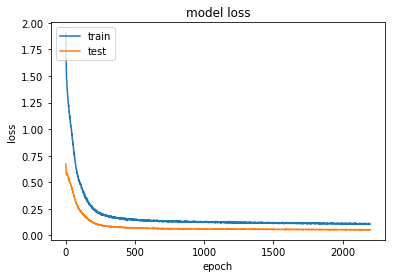

In [39]:
#print(score_f)
plt.plot(history_f.history['loss'])
plt.plot(history_f.history['rmsle'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
submit_pred_form = model_f.predict(X_submt.values)
submit_df = pd.DataFrame(submit_pred_form, columns=['formation_energy_ev_natom', "bandgap_energy_ev"])
submit_df[submit_df < 0] = 0
submit_df.insert(0, 'id', range(1, 601))

# Save to file
submit_df.to_csv("./k_dnn_7.csv", index=False)